<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/t-SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## t-SNE- MNIST

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data.



## About t-SNE-:

T-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## Import libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

## Get Dataset

In [13]:
!gdown --id 1BHByvjaeWcOMQ43G9aG320Jgm5bUf_-l

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BHByvjaeWcOMQ43G9aG320Jgm5bUf_-l
To: /content/MNIST.zip
100% 16.0M/16.0M [00:00<00:00, 121MB/s] 


## Unzip File

In [14]:
!unzip  MNIST.zip

Archive:  MNIST.zip
replace mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Craete DataFrame

In [15]:
df=pd.read_csv('mnist_train.csv')

## EDA

In [16]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.shape

(60000, 785)

## Craete Data and Label

In [18]:
label =df['label']
data =df.drop('label',axis=1)

In [19]:
print('data_Shape: ', data.shape)
print('data_type:', type(data))

data_Shape:  (60000, 784)
data_type: <class 'pandas.core.frame.DataFrame'>


## Change data to numpy

In [20]:
data = data.to_numpy()

In [21]:
print('data_type:', type(data))

data_type: <class 'numpy.ndarray'>


## Visualization

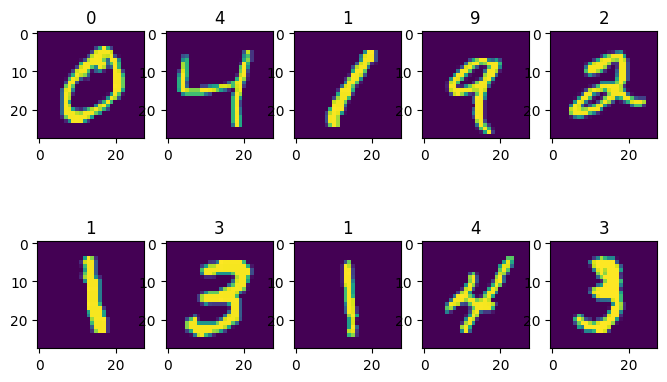

In [30]:
plt.figure(figsize=(8,5))
for i in range(1,11):
  plt.subplot(2 ,5, i)
  image = data[i,:].reshape(28,28)
  plt.imshow(image)
  plt.title(label[i])

## Scale Data

In [31]:
sc = StandardScaler()

In [32]:
data_sc=sc.fit_transform(data)

# Minimize Data

In [34]:
data_10000 = data_sc[:10000]
label_10000 = label[:10000]

## PCA

In [35]:
from sklearn.decomposition import PCA

In [40]:
pca_2 = PCA(n_components=2)

In [48]:
pca_2 = pca_2.fit_transform(data_10000)

In [39]:
pca_2.shape

(10000, 2)

## t-SNE

In [41]:
from sklearn.manifold import TSNE

In [43]:
tsne_2=TSNE(n_components=2)

In [44]:
tsne_2 = tsne_2.fit_transform(data_10000)

In [45]:
tsne_2 = np.vstack((tsne_2.T, label_10000)).T

## Plot

In [46]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,6))
c_map = plt.cm.get_cmap('jet', 10)

<ipython-input-46-848f6cb55329>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-46-848f6cb55329>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


<Figure size 1500x600 with 0 Axes>

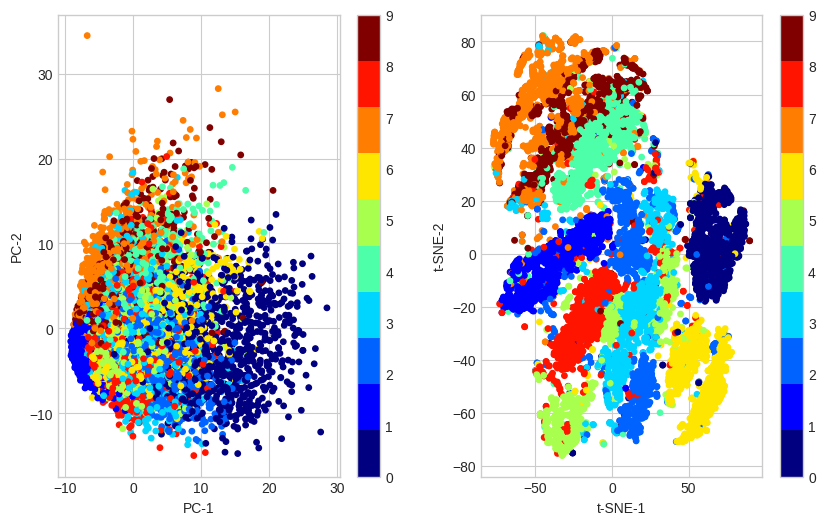

In [56]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(pca_2[:, 0], pca_2[:, 1], s = 15, cmap = c_map , c = label_10000)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')

plt.subplot(1, 2, 2)
plt.scatter(tsne_2[:, 0], tsne_2[:, 1], s = 15, cmap = c_map , c = label_10000)
plt.colorbar()
plt.xlabel('t-SNE-1') , plt.ylabel('t-SNE-2')


plt.show()

## Conclusion:

PCA Plot (Left):

PCA is a linear dimensionality reduction technique that transforms the data into a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
The x-axis and y-axis are labeled as 'PC-1' and 'PC-2', respectively, representing the first two principal components which capture the most variance in the data.
The scatter plot shows that there is some degree of clustering, with different colors (classes) grouped together. However, the boundaries between clusters are not very distinct, indicating that PCA might not be the best at separating different classes in this particular dataset.

t-SNE Plot (Right):

t-SNE is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
The axes are labeled 't-SNE-1' and 't-SNE-2', which are the two dimensions resulting from the t-SNE reduction.
The t-SNE plot shows a much clearer separation of clusters, with distinct groups of colors representing different classes. t-SNE has managed to bring out the structure of the data by separating the different classes more effectively than PCA.

In summary, this image suggests that t-SNE is more effective than PCA at visualizing clusters or classes in this dataset. While PCA provides a general sense of the spread and variance of the data, t-SNE reveals the underlying structure by clearly separating different classes in two-dimensional space.